In [1]:
import pandas as pd
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import neural_network
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score


In [2]:
hiper = False

In [3]:
dados = pd.read_csv('./output/Dados_Final.csv')
dados.set_index('Open time', inplace = True) # Data time como index
dados

,Open,High,Low,Close,Volume,ATR,EMA50,EMA144,EMA200,Boll50,...,ImbHigh,sma,sd,lb,ub,signal_BB,signal_rsi,MMS,Long,Short
Open time,,,,,,,,,,,,,,,,,,,,,
2000-02-17 04:00:00+03:00,0.98530,0.98740,0.98490,0.98610,562,0.00380,0.98447,0.99611,1.00261,0.36991,...,0.00000,0.982840,0.003450,0.975939,0.989741,0,0,False,0,0
2000-02-17 08:00:00+03:00,0.98630,0.99580,0.98510,0.99380,1660,0.00429,0.98483,0.99607,1.00252,1.96345,...,0.98840,0.983225,0.004185,0.974855,0.991595,1,0,False,0,0
2000-02-17 12:00:00+03:00,0.99370,0.99440,0.98840,0.98980,1654,0.00441,0.98503,0.99599,1.00239,1.04242,...,0.00000,0.983285,0.004274,0.974738,0.991832,0,0,False,0,0
2000-02-17 16:00:00+03:00,0.98990,0.99270,0.98370,0.98830,1321,0.00474,0.98516,0.99588,1.00225,0.69087,...,0.00000,0.983205,0.004157,0.974892,0.991518,0,0,False,0,0
2000-02-17 20:00:00+03:00,0.98850,0.98920,0.98680,0.98800,636,0.00457,0.98527,0.99577,1.00211,0.62116,...,0.00000,0.983430,0.004293,0.974844,0.992016,0,0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,1.00403,1.00460,0.99741,0.99793,23205,0.00411,1.00168,1.01025,1.01431,-0.89784,...,0.00000,0.999308,0.003522,0.992264,1.006351,0,0,False,0,0
2022-08-31 12:00:00+03:00,0.99794,1.00184,0.99714,1.00084,28012,0.00416,1.00165,1.01012,1.01417,-0.20233,...,0.00000,0.999537,0.003461,0.992614,1.006459,0,0,False,0,0
2022-08-31 16:00:00+03:00,1.00085,1.00790,0.99952,1.00535,39166,0.00446,1.00179,1.01005,1.01409,0.92636,...,1.00355,0.999858,0.003692,0.992475,1.007242,0,0,False,0,0


In [4]:
# dados.drop(columns='Open' ,inplace=True)
# dados.drop(columns='High' ,inplace=True)
# dados.drop(columns='Low' ,inplace=True)
dados.drop(columns='Volume' ,inplace=True)
# dados.drop(columns='ATR' ,inplace=True)
# dados.drop(columns='EMA50' ,inplace=True)
# dados.drop(columns='EMA144' ,inplace=True)
# dados.drop(columns='EMA200' ,inplace=True)
# dados.drop(columns='Boll50' ,inplace=True)
# dados.drop(columns='Boll144' ,inplace=True)
# dados.drop(columns='Boll200' ,inplace=True)
# dados.drop(columns='ROC50' ,inplace=True)
# dados.drop(columns='ROC144' ,inplace=True)
# dados.drop(columns='ROC200' ,inplace=True)
# dados.drop(columns='CrxFS' ,inplace=True)
# dados.drop(columns='CrxFM' ,inplace=True)
# dados.drop(columns='CrxMS' ,inplace=True)
# dados.drop(columns='RSI' ,inplace=True)
# # dados.drop(columns='Structure' ,inplace=True)
# # dados.drop(columns='ImbLow' ,inplace=True)
# # dados.drop(columns='ImbHigh' ,inplace=True)
# # dados.drop(columns='StructTop' ,inplace=True)
# # dados.drop(columns='StructBottom' ,inplace=True)
# dados.drop(columns='sma' ,inplace=True)
# dados.drop(columns='sd' ,inplace=True)
# dados.drop(columns='lb' ,inplace=True)
# dados.drop(columns='ub' ,inplace=True)
# dados.drop(columns='signal_BB' ,inplace=True)
# dados.drop(columns='signal_rsi' ,inplace=True)
# dados.drop(columns='MMS' ,inplace=True)

#Inner Circle Trade
dados.drop(columns='EMA50' ,inplace=True)
dados.drop(columns='EMA144' ,inplace=True)
dados.drop(columns='EMA200' ,inplace=True)
dados.drop(columns='Boll50' ,inplace=True)
dados.drop(columns='Boll144' ,inplace=True)
dados.drop(columns='Boll200' ,inplace=True)
dados.drop(columns='ROC50' ,inplace=True)
dados.drop(columns='ROC144' ,inplace=True)
dados.drop(columns='ROC200' ,inplace=True)
dados.drop(columns='CrxFS' ,inplace=True)
dados.drop(columns='CrxFM' ,inplace=True)
dados.drop(columns='CrxMS' ,inplace=True)
dados.drop(columns='RSI' ,inplace=True)
dados.drop(columns='sma' ,inplace=True)
dados.drop(columns='sd' ,inplace=True)
dados.drop(columns='lb' ,inplace=True)
dados.drop(columns='ub' ,inplace=True)
dados.drop(columns='signal_BB' ,inplace=True)
dados.drop(columns='signal_rsi' ,inplace=True)
dados.drop(columns='MMS' ,inplace=True)


In [5]:
dados

,Open,High,Low,Close,ATR,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short
Open time,,,,,,,,,,,,,,,,
2000-02-17 04:00:00+03:00,0.98530,0.98740,0.98490,0.98610,0.00380,0,0,1,0.99470,0.96670,0.692857,True,0.00000,0.00000,0,0
2000-02-17 08:00:00+03:00,0.98630,0.99580,0.98510,0.99380,0.00429,1,0,1,0.99470,0.96670,0.967857,True,0.98740,0.98840,0,0
2000-02-17 12:00:00+03:00,0.99370,0.99440,0.98840,0.98980,0.00441,0,0,1,0.99470,0.96670,0.825000,False,0.00000,0.00000,0,0
2000-02-17 16:00:00+03:00,0.98990,0.99270,0.98370,0.98830,0.00474,-1,0,1,0.99470,0.96670,0.771429,False,0.00000,0.00000,0,0
2000-02-17 20:00:00+03:00,0.98850,0.98920,0.98680,0.98800,0.00457,0,0,1,0.99470,0.96670,0.760714,False,0.00000,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,1.00403,1.00460,0.99741,0.99793,0.00411,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,0,0
2022-08-31 12:00:00+03:00,0.99794,1.00184,0.99714,1.00084,0.00416,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0
2022-08-31 16:00:00+03:00,1.00085,1.00790,0.99952,1.00535,0.00446,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0


In [6]:
x = dados.iloc[:, :-2]
y = dados.iloc[:, -2] #Long
z = dados.iloc[:, -1] #Short

In [7]:
# Visualização da proporção
print('----------- PROPORÇÃO DO LONG ----------')
display(y.value_counts())
print('----------- PROPORÇÃO DO SHORT ----------')
display(z.value_counts())

----------- PROPORÇÃO DO LONG ----------


0    26237
1     8861
Name: Long, dtype: int64

----------- PROPORÇÃO DO SHORT ----------


0    26863
1     8235
Name: Short, dtype: int64

<AxesSubplot: ylabel='Long'>

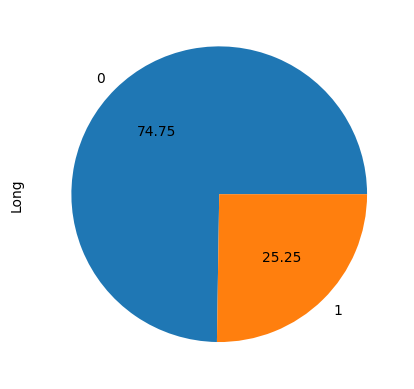

In [8]:
y.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='Short'>

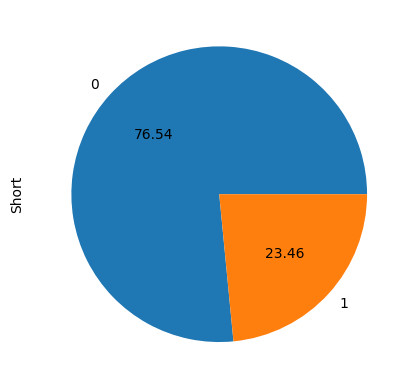

In [ ]:
z.value_counts().plot.pie(autopct='%.2f')

In [ ]:
treino_x, teste_x, treino_y, teste_y, treino_z, teste_z = train_test_split(x, y, z, test_size = 0.25, shuffle = False, random_state=42)

In [ ]:
dados_open = teste_x['Open'].copy()
treino_x.drop(columns='Open' ,inplace=True)
teste_x.drop(columns='Open' ,inplace=True)

dados_close = teste_x['Close'].copy()
treino_x.drop(columns='Close' ,inplace=True)
teste_x.drop(columns='Close' ,inplace=True)

dados_low = teste_x['Low'].copy()
treino_x.drop(columns='Low' ,inplace=True)
teste_x.drop(columns='Low' ,inplace=True)

dados_high = teste_x['High'].copy()
treino_x.drop(columns='High' ,inplace=True)
teste_x.drop(columns='High' ,inplace=True)

dados_atr = teste_x['ATR'].copy()
treino_x.drop(columns='ATR' ,inplace=True)
teste_x.drop(columns='ATR' ,inplace=True)

In [ ]:
display(treino_x)
display(teste_x)
print('Treino de y')
display(treino_y.value_counts())
print('Teste de y')
display(teste_y.value_counts())

print('Treino de z')
display(treino_z.value_counts())
print('Teste de z')
display(teste_z.value_counts())

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh
Open time,,,,,,,,,
2000-02-17 04:00:00+03:00,0,0,1,0.99470,0.9667,0.692857,True,0.0000,0.0000
2000-02-17 08:00:00+03:00,1,0,1,0.99470,0.9667,0.967857,True,0.9874,0.9884
2000-02-17 12:00:00+03:00,0,0,1,0.99470,0.9667,0.825000,False,0.0000,0.0000
2000-02-17 16:00:00+03:00,-1,0,1,0.99470,0.9667,0.771429,False,0.0000,0.0000
2000-02-17 20:00:00+03:00,0,0,1,0.99470,0.9667,0.760714,False,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
2017-01-10 00:00:00+03:00,1,0,-1,1.06698,1.0366,0.699144,True,0.0000,0.0000
2017-01-10 04:00:00+03:00,1,0,-1,1.06698,1.0366,0.800527,True,0.0000,0.0000
2017-01-10 08:00:00+03:00,0,0,-1,1.06698,1.0366,0.757406,False,0.0000,0.0000


,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh
Open time,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355


Treino de y


0    19552
1     6771
Name: Long, dtype: int64

Teste de y


0    6685
1    2090
Name: Long, dtype: int64

Treino de z


0    20230
1     6093
Name: Short, dtype: int64

Teste de z


0    6633
1    2142
Name: Short, dtype: int64

<AxesSubplot: ylabel='Long'>

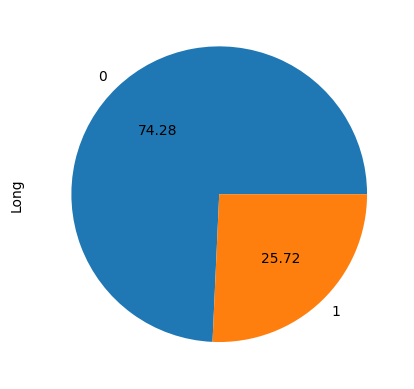

In [ ]:
treino_y.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='Long'>

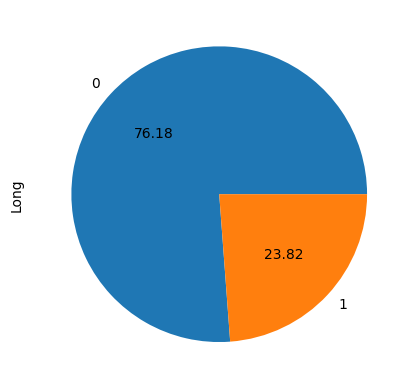

In [ ]:
teste_y.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='Short'>

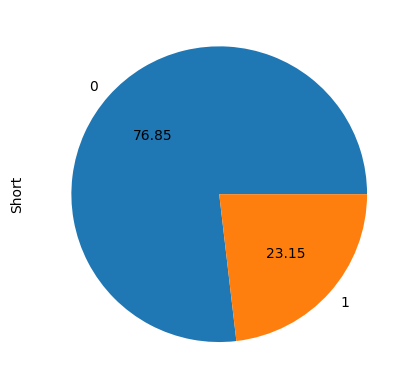

In [ ]:
treino_z.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='Short'>

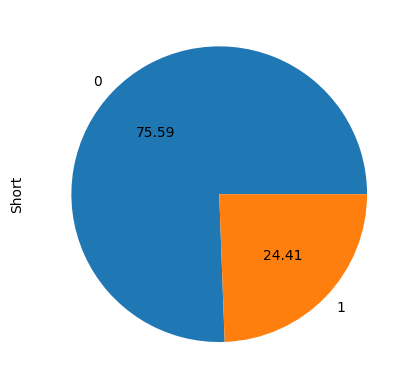

In [ ]:
teste_z.value_counts().plot.pie(autopct='%.2f')

### Balancemento do Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)#random_state=42

#### Balanceamento do Long

In [ ]:
X_resROS, y_resROS = ros.fit_resample(treino_x, treino_y)
X_resROS_s, z_resROS_s = ros.fit_resample(treino_x, treino_z)

In [ ]:
y_resROS

0        0
1        0
2        0
3        0
4        0
        ..
39099    1
39100    1
39101    1
39102    1
39103    1
Name: Long, Length: 39104, dtype: int64

In [ ]:
y_resROS.value_counts()

0    19552
1    19552
Name: Long, dtype: int64

In [ ]:
z_resROS_s.value_counts()

0    20230
1    20230
Name: Short, dtype: int64

<AxesSubplot: ylabel='Long'>

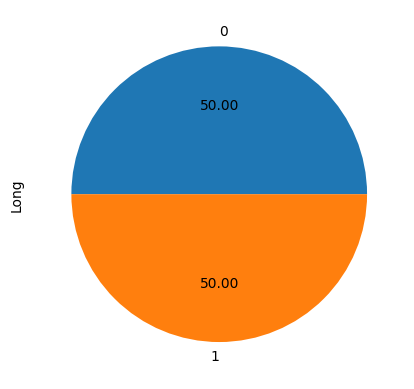

In [ ]:
y_resROS.value_counts().plot.pie(autopct='%.2f')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Support Vector Machine

In [ ]:
if(hiper == True):
    # Define the SVM model
    svm_model = SVC()

    # Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.5, 1]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, verbose = 2)
    grid_search.fit(X_resROS, y_resROS)

    print('SVM: ', grid_search.best_params_)

    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    # Evaluate the model on the test set
    accuracy = grid_search.score(teste_x, teste_y)
    print("Test Accuracy: ", accuracy)

elif(hiper == False):
    svm_model = SVC()

In [ ]:
if(hiper == True):
    # Define the SVM model
    svm_model = SVC()

    # Define the parameter grid
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.5, 1]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, verbose = 2)
    grid_search.fit(X_resROS, z_resROS_s)

    print('SVM: ', grid_search.best_params_)

    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    # Evaluate the model on the test set
    accuracy = grid_search.score(teste_x, teste_y)
    print("Test Accuracy: ", accuracy)

elif(hiper == False):
    svm_model_s = SVC()

In [ ]:
modelo_SVM_l = svm_model
modelo_SVM_s = svm_model_s

modelo_SVM_l.fit(X_resROS, y_resROS)
modelo_SVM_s.fit(X_resROS_s, z_resROS_s)

previsoes_SVM_l = modelo_SVM_l.predict(teste_x)
previsoes_SVM_s = modelo_SVM_s.predict(teste_x)

acuracia_SVM_l = accuracy_score(teste_y, previsoes_SVM_l) * 100 # taxa de acerto
acuracia_SVM_s = accuracy_score(teste_z, previsoes_SVM_s) * 100 # taxa de acerto

print("A acurácia do Long foi %.2f%%" % acuracia_SVM_l)
print("A acurácia do Short foi %.2f%%" % acuracia_SVM_s)

A acurácia do Long foi 54.21%
A acurácia do Short foi 53.90%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(teste_y, previsoes_SVM_l)

array([[3651, 3034],
       [ 984, 1106]], dtype=int64)

In [ ]:
confusion_matrix(teste_z, previsoes_SVM_s)

array([[3693, 2940],
       [1105, 1037]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score
precision_score(teste_y, previsoes_SVM_l)

0.26714975845410627

In [ ]:
precision_score(teste_z, previsoes_SVM_s)

0.26074930852401307

In [ ]:
dados_SVM = teste_x.copy()
dados_SVM['Long'] = previsoes_SVM_l
dados_SVM['Short'] = previsoes_SVM_s

display(dados_SVM)
display(dados_SVM['Long'].value_counts())
display(dados_SVM['Short'].value_counts())

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short
Open time,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,1,0
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,1,0
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,1
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,1,0
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,1,0


0    4635
1    4140
Name: Long, dtype: int64

0    4798
1    3977
Name: Short, dtype: int64

### Arvore de decisão

In [ ]:


if(hiper == True):
    parametros_arvore = {
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'random_state': [10, 20, 30, 40, 50]
    }
    arvore = GridSearchCV(DecisionTreeClassifier(), parametros_arvore,verbose = 2).fit(X_resROS,y_resROS)
    print('Arvore: ', arvore.best_params_)
    arvore = DecisionTreeClassifier(criterion = arvore.best_estimator_.criterion, max_depth = arvore.best_estimator_.max_depth, random_state = arvore.best_estimator_.random_state)
    
elif(hiper == False):
    arvore = DecisionTreeClassifier()


# parametros_arvore = {
#     'criterion': ['entropy', 'gini'],
#     'splitter': ['best', 'random'],
#     'max_depth': [5, 10, 15, 20, 25, 30],
#     'random_state': [10, 20, 30, 40, 50]
# }
# arvore = GridSearchCV(DecisionTreeClassifier(), parametros_arvore,verbose = 2).fit(X_resROS,y_resROS)
# print('Arvore: ', arvore.best_params_)
# arvore = DecisionTreeClassifier(criterion = arvore.best_estimator_.criterion, max_depth = arvore.best_estimator_.max_depth, random_state = arvore.best_estimator_.random_state)

In [ ]:
if(hiper == True):
    parametros_arvore_s = {
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'random_state': [10, 20, 30, 40, 50]
    }
    arvore_s = GridSearchCV(DecisionTreeClassifier(), parametros_arvore_s,verbose = 2).fit(X_resROS_s,z_resROS_s)
    print('Arvore: ', arvore_s.best_params_)
    arvore_s = DecisionTreeClassifier(criterion = arvore_s.best_estimator_.criterion, max_depth = arvore_s.best_estimator_.max_depth, random_state = arvore_s.best_estimator_.random_state)

elif(hiper == False):
    arvore_s = DecisionTreeClassifier()




# parametros_arvore_s = {
#     'criterion': ['entropy', 'gini'],
#     'splitter': ['best', 'random'],
#     'max_depth': [5, 10, 15, 20, 25, 30],
#     'random_state': [10, 20, 30, 40, 50]
# }
# arvore_s = GridSearchCV(DecisionTreeClassifier(), parametros_arvore_s,verbose = 2).fit(X_resROS_s,z_resROS_s)
# print('Arvore: ', arvore_s.best_params_)
# arvore_s = DecisionTreeClassifier(criterion = arvore_s.best_estimator_.criterion, max_depth = arvore_s.best_estimator_.max_depth, random_state = arvore_s.best_estimator_.random_state)

In [ ]:
modelo_DT_l = arvore
modelo_DT_s = arvore_s

modelo_DT_l.fit(X_resROS, y_resROS)
modelo_DT_s.fit(X_resROS_s, z_resROS_s)

previsoes_DT_l = modelo_DT_l.predict(teste_x)
previsoes_DT_s = modelo_DT_s.predict(teste_x)

acuracia_DT_l = accuracy_score(teste_y, previsoes_DT_l) * 100 # taxa de acerto
acuracia_DT_s = accuracy_score(teste_z, previsoes_DT_s) * 100 # taxa de acerto

print("A acurácia do Long foi %.2f%%" % acuracia_DT_l)
print("A acurácia do Short foi %.2f%%" % acuracia_DT_s)

A acurácia do Long foi 62.51%
A acurácia do Short foi 63.38%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(teste_y, previsoes_DT_l)

array([[5012, 1673],
       [1617,  473]], dtype=int64)

In [ ]:
confusion_matrix(teste_z, previsoes_DT_s)

array([[5008, 1625],
       [1588,  554]], dtype=int64)

In [ ]:
precision_score(teste_y, previsoes_DT_l)

0.22041006523765144

In [ ]:
precision_score(teste_y, previsoes_DT_s)

0.20881138136759983

In [ ]:
dados_DT = teste_x.copy()
dados_DT['Long'] = previsoes_DT_l
dados_DT['Short'] = previsoes_DT_s

display(dados_DT)
display(dados_DT['Long'].value_counts())
display(dados_DT['Short'].value_counts())

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short
Open time,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,0
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,0,1
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0


0    6629
1    2146
Name: Long, dtype: int64

0    6596
1    2179
Name: Short, dtype: int64

### Floresta Aleatória

In [ ]:
if(hiper == True):
        parametros_floresta = {
                'n_estimators': [50, 100, 150, 200],
                'criterion': ['entropy', 'gini'],
                'max_depth': [5, 10, 15],
                'random_state': [10, 20, 30, 40, 50]
        }
        floresta = GridSearchCV(RandomForestClassifier(), parametros_floresta,verbose = 2).fit(X_resROS,y_resROS)
        print('Floresta: ', floresta.best_params_)
        floresta = RandomForestClassifier(criterion = floresta.best_estimator_.criterion, max_depth = floresta.best_estimator_.max_depth, n_estimators = floresta.best_estimator_.n_estimators, random_state=floresta.best_estimator_.random_state)

elif(hiper == False):
        floresta = RandomForestClassifier()



# parametros_floresta = {
#         'n_estimators': [50, 100, 150, 200],
#         'criterion': ['entropy', 'gini'],
#         'max_depth': [5, 10, 15]
# }
# floresta = GridSearchCV(RandomForestClassifier(), parametros_floresta,verbose = 2).fit(X_resROS,y_resROS)
# print('Floresta: ', floresta.best_params_)
# floresta = RandomForestClassifier(criterion = floresta.best_estimator_.criterion, max_depth = floresta.best_estimator_.max_depth, n_estimators = floresta.best_estimator_.n_estimators)

In [ ]:
if(hiper == True):
        parametros_floresta_s = {
                'n_estimators': [50, 100, 150, 200],
                'criterion': ['entropy', 'gini'],
                'max_depth': [5, 10, 15],
                'random_state': [10, 20, 30, 40, 50]
        }
        floresta_s = GridSearchCV(RandomForestClassifier(), parametros_floresta_s,verbose = 2).fit(X_resROS_s,z_resROS_s)
        print('Floresta: ', floresta_s.best_params_)
        floresta_s = RandomForestClassifier(criterion = floresta_s.best_estimator_.criterion, max_depth = floresta_s.best_estimator_.max_depth, n_estimators = floresta_s.best_estimator_.n_estimators, random_state=floresta_s.best_estimator_.random_state)

elif(hiper == False):
        floresta_s = RandomForestClassifier()


# parametros_floresta_s = {
#         'n_estimators': [50, 100, 150, 200],
#         'criterion': ['entropy', 'gini'],
#         'max_depth': [5, 10, 15]
# }
# floresta_s = GridSearchCV(RandomForestClassifier(), parametros_floresta_s,verbose = 2).fit(X_resROS_s,z_resROS_s)
# print('Floresta: ', floresta_s.best_params_)
# floresta_s = RandomForestClassifier(criterion = floresta_s.best_estimator_.criterion, max_depth = floresta_s.best_estimator_.max_depth, n_estimators = floresta_s.best_estimator_.n_estimators)

In [ ]:
# A Acuracia está variando, analizar como impedidir (max_inter)

modelo_RF_l = floresta
modelo_RF_s = floresta_s

modelo_RF_l.fit(X_resROS, y_resROS)
modelo_RF_s.fit(X_resROS_s, z_resROS_s)

previsoes_RF_l = modelo_RF_l.predict(teste_x)
previsoes_RF_s = modelo_RF_s.predict(teste_x)

acuracia_RF_l = accuracy_score(teste_y, previsoes_RF_l) * 100 # taxa de acerto
acuracia_RF_s = accuracy_score(teste_z, previsoes_RF_s) * 100 # taxa de acerto

print("A acurácia do Long foi %.2f%%" % acuracia_RF_l)
print("A acurácia do Short foi %.2f%%" % acuracia_RF_s)

A acurácia do Long foi 68.48%
A acurácia do Short foi 69.07%


In [ ]:
confusion_matrix(teste_y, previsoes_RF_l)

array([[5633, 1052],
       [1714,  376]], dtype=int64)

In [ ]:
confusion_matrix(teste_z, previsoes_RF_s)

array([[5620, 1013],
       [1701,  441]], dtype=int64)

In [ ]:
precision_score(teste_y, previsoes_RF_l)

0.26330532212885155

In [ ]:
precision_score(teste_z, previsoes_RF_s)

0.3033012379642366

In [ ]:
dados_RF = teste_x.copy()
dados_RF['Long'] = previsoes_RF_l
dados_RF['Short'] = previsoes_RF_s

display(dados_RF)
display(dados_RF['Long'].value_counts())
display(dados_RF['Short'].value_counts())

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short
Open time,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,0
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,0,0
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0


0    7347
1    1428
Name: Long, dtype: int64

0    7321
1    1454
Name: Short, dtype: int64

### Rede Neural

In [ ]:
if(hiper == True):
        parametros_rede = {
                # 'max_iter': [500, 1000, 5000, 10000],
                # 'hidden_layer_sizes': np.arange(10, 15),
                # 'alpha': [0.0001, 0.001, 0.01, 0.1],
                # 'learning_rate': ['constant', 'adaptative'],
                # 'momentum': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

                # 'max_iter': [5000, 10000],
                # 'hidden_layer_sizes': np.arange(14, 15),
                # 'alpha': [0.1],
                # 'learning_rate': ['constant', 'adaptative'],
                # 'momentum': [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
                'hidden_layer_sizes': np.arange(10, 20),
                'random_state': [10, 20, 30, 40, 50]

        }
        rede = GridSearchCV(neural_network.MLPClassifier(max_iter=500), parametros_rede,verbose = 2).fit(X_resROS,y_resROS)
        print('Rede: ', rede.best_params_)
        rede = neural_network.MLPClassifier(max_iter = rede.best_estimator_.max_iter, hidden_layer_sizes = rede.best_estimator_.hidden_layer_sizes, alpha = rede.best_estimator_.alpha, learning_rate = rede.best_estimator_.learning_rate, momentum = rede.best_estimator_.momentum, random_state=rede.best_estimator_.random_state)
elif(hiper == False):
        rede = MLPClassifier()



# parametros_rede = {
#         # 'max_iter': [500, 1000, 5000, 10000],
#         # 'hidden_layer_sizes': np.arange(10, 15),
#         # 'alpha': [0.0001, 0.001, 0.01, 0.1],
#         # 'learning_rate': ['constant', 'adaptative'],
#         # 'momentum': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

#         # 'max_iter': [5000, 10000],
#         # 'hidden_layer_sizes': np.arange(14, 15),
#         # 'alpha': [0.1],
#         # 'learning_rate': ['constant', 'adaptative'],
#         # 'momentum': [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
#         'hidden_layer_sizes': np.arange(10, 20)

# }
# rede = GridSearchCV(neural_network.MLPClassifier(max_iter=500), parametros_rede,verbose = 2).fit(X_resROS,y_resROS)
# print('Rede: ', rede.best_params_)
# rede = neural_network.MLPClassifier(max_iter = rede.best_estimator_.max_iter, hidden_layer_sizes = rede.best_estimator_.hidden_layer_sizes, alpha = rede.best_estimator_.alpha, learning_rate = rede.best_estimator_.learning_rate, momentum = rede.best_estimator_.momentum)

In [ ]:
if(hiper == True):
        parametros_rede = {
                # 'max_iter': [500, 1000, 5000, 10000],
                # 'hidden_layer_sizes': np.arange(10, 15),
                # 'alpha': [0.0001, 0.001, 0.01, 0.1],
                # 'learning_rate': ['constant', 'adaptative'],
                # 'momentum': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

                # 'max_iter': [5000, 10000],
                # 'hidden_layer_sizes': np.arange(14, 15),
                # 'alpha': [0.1],
                # 'learning_rate': ['constant', 'adaptative'],
                # 'momentum': [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
                'hidden_layer_sizes': np.arange(10, 20),
                'random_state': [10, 20, 30, 40, 50]

        }
        rede_s = GridSearchCV(neural_network.MLPClassifier(max_iter=500), parametros_rede,verbose = 2).fit(X_resROS_s,z_resROS_s)
        print('Rede: ', rede_s.best_params_)
        rede_s = neural_network.MLPClassifier(max_iter = rede_s.best_estimator_.max_iter, hidden_layer_sizes = rede_s.best_estimator_.hidden_layer_sizes, alpha = rede_s.best_estimator_.alpha, learning_rate = rede_s.best_estimator_.learning_rate, momentum = rede_s.best_estimator_.momentum, random_state=rede_s.best_estimator_.random_state)
elif(hiper == False):
        rede_s = MLPClassifier()

In [ ]:
modelo_RN_l = rede #0.001 #max_iter=numero_de_epocas,verbose=False,momentum=momento,learning_rate='constant',learning_rate_init=taxa_de_aprendizado
modelo_RN_s = rede_s#rede 'alpha': 0.1, 'hidden_layer_sizes': 13, 'learning_rate': 'constant', 'max_iter': 5000, 'momentum': 0.6

# modelo_RN_l = MLPClassifier(max_iter=500)

modelo_RN_l.fit(X_resROS,y_resROS.values.ravel());
modelo_RN_s.fit(X_resROS_s,z_resROS_s.values.ravel());

previsoes_RN_l = modelo_RN_l.predict(teste_x)
previsoes_RN_s = modelo_RN_s.predict(teste_x)

acuracia_RN_l = accuracy_score(teste_y, previsoes_RN_l) * 100 # taxa de acerto
acuracia_RN_s = accuracy_score(teste_z, previsoes_RN_s) * 100 # taxa de acerto

print("A acurácia do Long foi %.2f%%" % acuracia_RN_l)
print("A acurácia do Short foi %.2f%%" % acuracia_RN_s)

c:\Users\Marco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A acurácia do Long foi 56.49%
A acurácia do Short foi 66.40%


In [ ]:
confusion_matrix(teste_y, previsoes_RN_l)

array([[3989, 2696],
       [1122,  968]], dtype=int64)

In [ ]:
confusion_matrix(teste_z, previsoes_RN_s)

array([[5227, 1406],
       [1542,  600]], dtype=int64)

In [ ]:
precision_score(teste_y, previsoes_RN_l)

0.26419213973799127

In [ ]:
precision_score(teste_z, previsoes_RN_s)

0.29910269192422734

In [ ]:
# outro modo de ver o score
modelo_RN_l.score(X_resROS, y_resROS)

0.5708878887070377

In [ ]:
dados_RN = teste_x.copy()
dados_RN['Long'] = previsoes_RN_l
dados_RN['Short'] = previsoes_RN_s

display(dados_RN)
display(dados_RN['Long'].value_counts())

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short
Open time,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,1
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,1
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,1,0
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,1
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0


0    5111
1    3664
Name: Long, dtype: int64

### Acuracia dos modelos

In [ ]:
print('-----MODELO SVM-----')
print("A acurácia do Long foi %.2f%%" % acuracia_SVM_l)
print("A acurácia do Short foi %.2f%%" % acuracia_SVM_s)
print('=================================')
print('-----MODELO ÁRVORE DE DECISÃO-----')
print("A acurácia do Long foi %.2f%%" % acuracia_DT_l)
print("A acurácia do Short foi %.2f%%" % acuracia_DT_s)
print('=================================')
print('-----MODELO FLORESTA ALEATÓRIA-----')
print("A acurácia do Long foi %.2f%%" % acuracia_RF_l)
print("A acurácia do Short foi %.2f%%" % acuracia_RF_s)
print('=================================')
print('-----MODELO REDE NEURAL-----')
print("A acurácia do Long foi %.2f%%" % acuracia_RN_l)
print("A acurácia do Short foi %.2f%%" % acuracia_RN_s)
print('================================')

-----MODELO SVM-----
A acurácia do Long foi 54.21%
A acurácia do Short foi 53.90%
-----MODELO ÁRVORE DE DECISÃO-----
A acurácia do Long foi 62.51%
A acurácia do Short foi 63.38%
-----MODELO FLORESTA ALEATÓRIA-----
A acurácia do Long foi 68.48%
A acurácia do Short foi 69.07%
-----MODELO REDE NEURAL-----
A acurácia do Long foi 56.49%
A acurácia do Short foi 66.40%


### Exportando dataframes Over

In [ ]:
# Dataframe SVM
dados_SVM['Open'] = dados_open
dados_SVM['Close'] = dados_close
dados_SVM['Low'] = dados_low
dados_SVM['High'] = dados_high
dados_SVM['ATR'] = dados_atr
dados_SVM.to_csv('./output/prev/Over/Dados_Prev_SVM.csv')

# Dataframe Decision Tree
dados_DT['Open'] = dados_open
dados_DT['Close'] = dados_close
dados_DT['Low'] = dados_low
dados_DT['High'] = dados_high
dados_DT['ATR'] = dados_atr
dados_DT.to_csv('./output/prev/Over/Dados_Prev_DT.csv')

# Dataframe Random Forest
dados_RF['Open'] = dados_open
dados_RF['Close'] = dados_close
dados_RF['Low'] = dados_low
dados_RF['High'] = dados_high
dados_RF['ATR'] = dados_atr
dados_RF.to_csv('./output/prev/Over/Dados_Prev_RF.csv')

# Dataframe Neurakl Network
dados_RN['Open'] = dados_open
dados_RN['Close'] = dados_close
dados_RN['Low'] = dados_low
dados_RN['High'] = dados_high
dados_RN['ATR'] = dados_atr
dados_RN.to_csv('./output/prev/Over/Dados_Prev_RN.csv')

In [ ]:
display(dados_SVM)
display(dados_DT)
display(dados_RF)
display(dados_RN)

,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short,Open,Close,Low,High,ATR
Open time,,,,,,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,1,0,1.05607,1.05534,1.05530,1.05642,0.00392
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0,1.05530,1.05577,1.05493,1.05656,0.00376
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,1,0,1.05577,1.05494,1.05359,1.05603,0.00366
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,1,1.05492,1.05348,1.05300,1.05665,0.00366
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,1,0,1.05349,1.05127,1.04937,1.05358,0.00370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,1,0,1.00403,0.99793,0.99741,1.00460,0.00411
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0,0.99794,1.00084,0.99714,1.00184,0.00416
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,1,0,1.00085,1.00535,0.99952,1.00790,0.00446


,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short,Open,Close,Low,High,ATR
Open time,,,,,,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0,1.05607,1.05534,1.05530,1.05642,0.00392
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0,1.05530,1.05577,1.05493,1.05656,0.00376
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0,1.05577,1.05494,1.05359,1.05603,0.00366
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,0,1.05492,1.05348,1.05300,1.05665,0.00366
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,0,0,1.05349,1.05127,1.04937,1.05358,0.00370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,0,1,1.00403,0.99793,0.99741,1.00460,0.00411
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0,0.99794,1.00084,0.99714,1.00184,0.00416
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0,1.00085,1.00535,0.99952,1.00790,0.00446


,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short,Open,Close,Low,High,ATR
Open time,,,,,,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0,1.05607,1.05534,1.05530,1.05642,0.00392
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,0,1.05530,1.05577,1.05493,1.05656,0.00376
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0,1.05577,1.05494,1.05359,1.05603,0.00366
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,0,1.05492,1.05348,1.05300,1.05665,0.00366
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,0,0,1.05349,1.05127,1.04937,1.05358,0.00370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,0,0,1.00403,0.99793,0.99741,1.00460,0.00411
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,0,0.99794,1.00084,0.99714,1.00184,0.00416
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0,1.00085,1.00535,0.99952,1.00790,0.00446


,Engolfo,FuCandle,Structure,StructTop,StructBottom,StructPD,VelaBull,ImbLow,ImbHigh,Long,Short,Open,Close,Low,High,ATR
Open time,,,,,,,,,,,,,,,,
2017-01-10 20:00:00+03:00,0,0,-1,1.06698,1.03660,0.616853,False,0.00000,0.00000,0,0,1.05607,1.05534,1.05530,1.05642,0.00392
2017-01-11 00:00:00+03:00,0,0,-1,1.06698,1.03660,0.631007,True,0.00000,0.00000,0,1,1.05530,1.05577,1.05493,1.05656,0.00376
2017-01-11 04:00:00+03:00,0,0,-1,1.06698,1.03660,0.603687,False,0.00000,0.00000,0,0,1.05577,1.05494,1.05359,1.05603,0.00366
2017-01-11 08:00:00+03:00,-1,0,-1,1.06698,1.03660,0.555629,False,1.05358,1.05359,0,1,1.05492,1.05348,1.05300,1.05665,0.00366
2017-01-11 12:00:00+03:00,-1,0,-1,1.06698,1.03660,0.482883,False,0.00000,0.00000,1,0,1.05349,1.05127,1.04937,1.05358,0.00370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 08:00:00+03:00,-1,0,-1,1.00955,0.99004,0.404408,False,0.00000,0.00000,1,0,1.00403,0.99793,0.99741,1.00460,0.00411
2022-08-31 12:00:00+03:00,0,0,-1,1.00955,0.99004,0.553562,True,0.00000,0.00000,0,1,0.99794,1.00084,0.99714,1.00184,0.00416
2022-08-31 16:00:00+03:00,1,0,-1,1.00955,0.99004,0.784726,True,1.00184,1.00355,0,0,1.00085,1.00535,0.99952,1.00790,0.00446
